# Import des librairies

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des fichiers

In [2]:
data2015 = pd.read_csv('2015-building-energy-benchmarking.csv',sep=',',na_values=['NaN'])
data2016 = pd.read_csv('2016-building-energy-benchmarking.csv',sep=',',na_values=['NaN'])

Deux fichiers distincts représentant le même thème "Building energy Benchmarking" sont présents sur l'année 2015 et l'année 2016. Nous allons les analyser un par un et connaitre leurs similitudes et leurs différences, afin de pouvoir les concaténer en un seul et même dataset.

In [3]:
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
data2015.shape

(3340, 47)

In [5]:
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [6]:
data2016.shape

(3376, 46)

In [7]:
data2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [8]:
data2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

L'analyse rapide des features des deux fichiers nous pousse à les concaténer en un seul fichier, en gardant les colonnes en commun et les colonnes importantes.

# Union des deux dataframe

In [9]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data2015.columns) - set(data2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data2016.columns) - set(data2015.columns))

colonnes présentes sur données 2015 et absentes sur 2016 : 
 {'Seattle Police Department Micro Community Policing Plan Areas', 'Location', 'Comment', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'City Council Districts', 'Zip Codes', 'OtherFuelUse(kBtu)', 'SPD Beats', '2010 Census Tracts', 'GHGEmissions(MetricTonsCO2e)'}

colonnes présentes sur données 2016 et absentes sur 2015 : 
 {'Longitude', 'Latitude', 'Comments', 'State', 'Address', 'ZipCode', 'GHGEmissionsIntensity', 'TotalGHGEmissions', 'City'}


Certaines colonnes ont été renommées entre les 2 années : Nous les détectons et les renommons à notre tour, pour ne pas perdre l'information. On renomme les colonnes donc dans un premier temps, puis on supprime les anciennes.


In [10]:
data2015['TotalGHGEmissions'] = data2015['GHGEmissions(MetricTonsCO2e)']
data2015['GHGEmissionsIntensity'] = data2015['GHGEmissionsIntensity(kgCO2e/ft2)']
data2015.drop(['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1, inplace=True)

L'objectif est de garder les colonnes communes entre les 2 années en ne biaisant pas de dataset.

In [11]:
columns2016 = list(data2016.columns)
columns2015 = list(data2015.columns)
dropcolumns2016 = list(set(columns2016) - set(columns2015))  
dropcolumns2015 = list(set(columns2015) - set(columns2016))

In [12]:
data2015.drop(dropcolumns2015, axis=1, inplace=True)
data2016.drop(dropcolumns2016, axis=1, inplace=True)

In [13]:
print('colonnes présentes sur données 2015 et absentes sur 2016 : \n', set(data2015.columns) - set(data2016.columns))
print('\ncolonnes présentes sur données 2016 et absentes sur 2015 : \n', set(data2016.columns) - set(data2015.columns))

colonnes présentes sur données 2015 et absentes sur 2016 : 
 set()

colonnes présentes sur données 2016 et absentes sur 2015 : 
 set()


On crée donc notre dataset contenant uniquement les colonnes communes entre les 2 fichiers, pour une meilleure utilisation : 

In [14]:
data = pd.concat([data2015, data2016], axis=0, sort=False)

data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,...,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,No,Compliant,NaN,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,...,0.0,1144563.0,3905411.0,44490.0,4448985.0,No,Compliant,NaN,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,...,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,Yes,Compliant,NaN,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,...,23458518.0,811521.0,2769023.0,20019.0,2001894.0,No,Compliant,High Outlier,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,...,0.0,1777841.0,6066245.0,87631.0,8763105.0,No,Compliant,NaN,507.70,4.02


In [15]:
data.shape

(6716, 39)

On cherche à connaitre le type de chaque feature, pour savoir si on doit transformer ou non certaines variables :

In [16]:
data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
YearsENERGYSTARCertified            object
ENERGYSTARScore                    float64
SiteEUI(kBt

# Traitement des valeurs manquantes 
Nous avons plusieurs valeurs manquantes dans ce jeu de données. Voyons d'abord voir le pourcentage de valeurs :

In [17]:
#pourcentatge de valeurs manquantes
def pourcentage_nan(data=data):
    somme = 0
    for colonne in data.columns:
        somme += data[colonne].isna().sum()
    return (somme / (data.shape[0]*data.shape[1]))*100
pourcentage_nan()

12.785388127853881

Environ 13% de valeurs manquantes dans le dataset. Nous pouvons les traiter :

In [18]:
# suppression des colonnes avec plus de 80% de valeurs manquantes
data = data.loc[:, data.isnull().mean() < .80]

In [19]:
data.isna().sum().sum()

9281

In [20]:
data.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
TaxParcelIdentificationNumber         2
CouncilDistrictCode                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        8
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes           136
LargestPropertyUseType              156
LargestPropertyUseTypeGFA           156
SecondLargestPropertyUseType       3478
SecondLargestPropertyUseTypeGFA    3478
ENERGYSTARScore                    1623
SiteEUI(kBtu/sf)                     17
SiteEUIWN(kBtu/sf)                   16
SourceEUI(kBtu/sf)                   19
SourceEUIWN(kBtu/sf)                 19
SiteEnergyUse(kBtu)                  15


On applique la médiane pour les valeurs manquantes quantitatives, pour que cela ne biaise pas le dataset. Pour les variables qualitatives, une mention "Unkown" suffira à combler nos NaN.

In [21]:
data['LargestPropertyUseTypeGFA'] = data['LargestPropertyUseTypeGFA'].fillna(data['LargestPropertyUseTypeGFA'].median())

C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/3226959335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LargestPropertyUseTypeGFA'] = data['LargestPropertyUseTypeGFA'].fillna(data['LargestPropertyUseTypeGFA'].median())


In [22]:
data['SecondLargestPropertyUseTypeGFA'] = data['SecondLargestPropertyUseTypeGFA'].fillna(data['SecondLargestPropertyUseTypeGFA'].median())

C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/886458896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SecondLargestPropertyUseTypeGFA'] = data['SecondLargestPropertyUseTypeGFA'].fillna(data['SecondLargestPropertyUseTypeGFA'].median())


In [23]:
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('Unknown', inplace=False)

C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/897930549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('Unknown', inplace=False)


In [24]:
data['SecondLargestPropertyUseType'] = data['SecondLargestPropertyUseType'].fillna('Unkown', inplace=False)

C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/863646652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SecondLargestPropertyUseType'] = data['SecondLargestPropertyUseType'].fillna('Unkown', inplace=False)


Le traitement des valeurs manquantes étant réalisé pour la majorité, nous nous occuperons des quelques valeurs manquantes restantes pour les colonnes qui nous intéressent dans notre étude plus tard.

# Analyse multivariée 

Notre objectif étant de ne pas avoir des variables trop corrélées entre elles et avec les variables cibles. Nous traçons donc la matrice de corrélation entre nos différentes variables.
D'après l'énoncé, nous cherchons à prédire le C02 et l'énergie, nos deux variables cibles sont donc : SiteEnergyUSE et TotalCHGEEmission.

<AxesSubplot:>

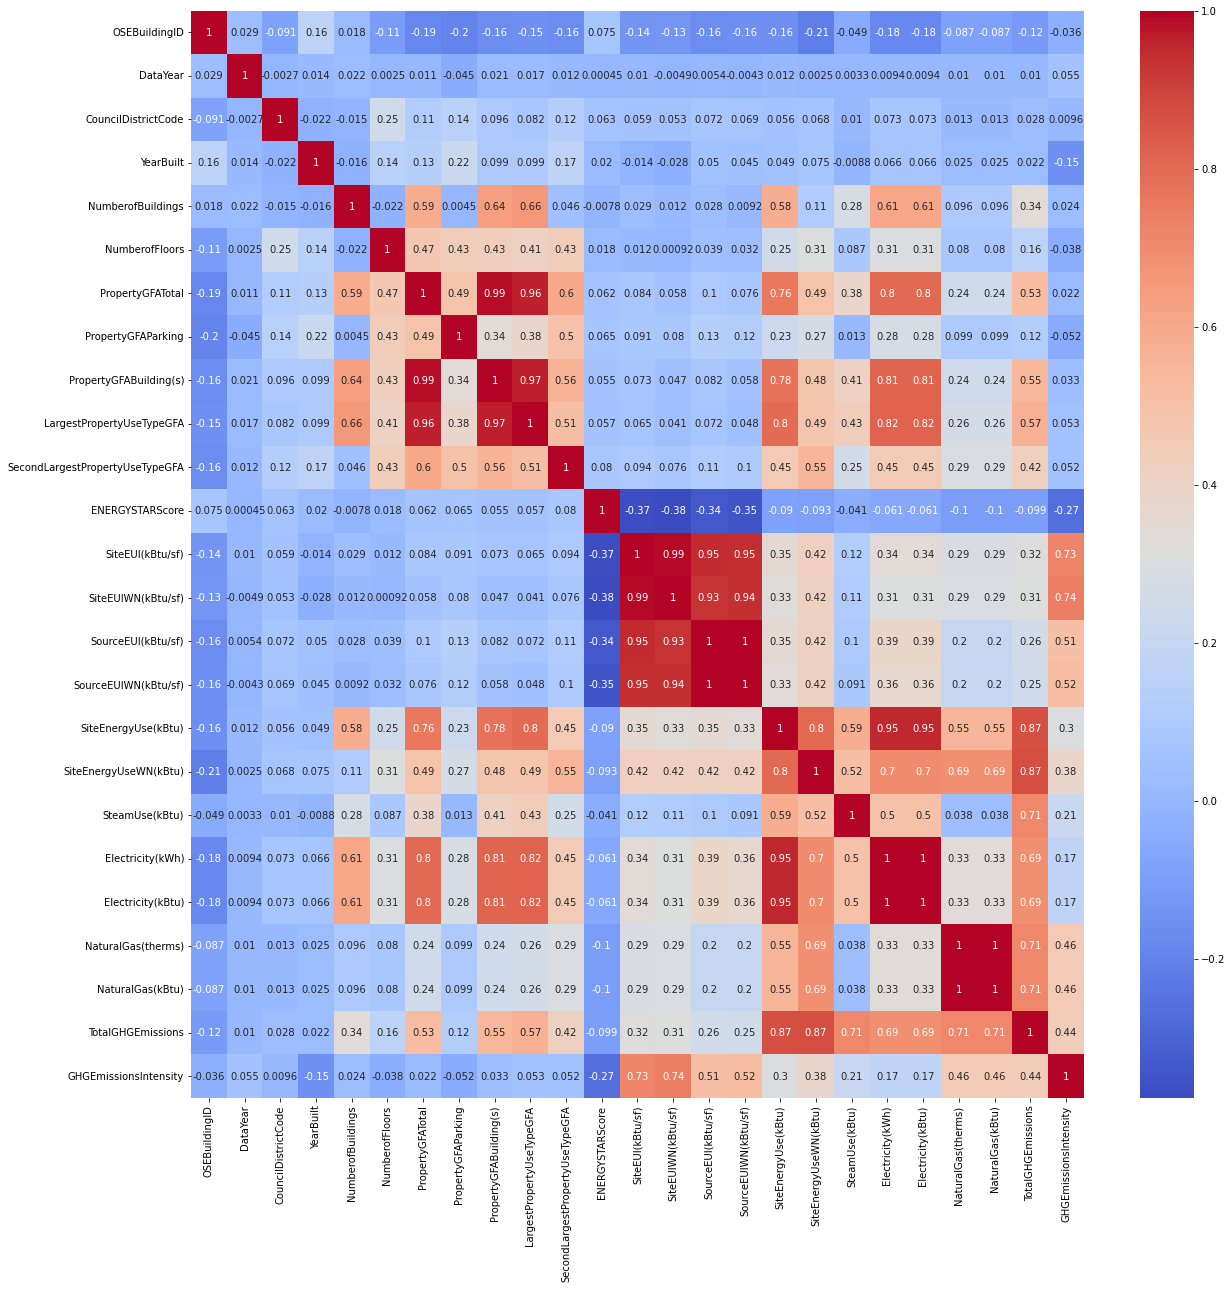

In [25]:
cor=data.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax,cmap='coolwarm')

On supprime les colonnes totalement corrélées entre elles puisque pas d'utilité pour la suite de l'analyse. 
On supprime également les colonne très corrélées à nos variables cibles.(NaturalGas, Electricity..)
On supprime également les Variables WN qui representent weather normalized, qui sont des variables corrigées par l'effet climatique. 

In [26]:
a_supprimer = ['NaturalGas(therms)', 'Electricity(kWh)','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'LargestPropertyUseTypeGFA']
data.drop(a_supprimer, axis=1, inplace=True)

C:\Users\nha5600\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Sélection des batiments non résidentiels pour l'étude

Notre objectif étant d'avoir uniquement les batiments non résidentiels dans notre étude, nous remplaçons toutes les valeurs des batiments non résidentiels par la même valeur : "NonResidential"

In [27]:
data.BuildingType.value_counts()

NonResidential          2921
Multifamily LR (1-4)    2047
Multifamily MR (5-9)    1134
Multifamily HR (10+)     217
SPS-District K-12        197
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [28]:
data['BuildingType']=data['BuildingType'].replace('Nonresidential COS', 'NonResidential')
data['BuildingType']=data['BuildingType'].replace('Nonresidential WA', 'NonResidential')
data['BuildingType']=data['BuildingType'].replace('SPS-District K-12', 'NonResidential')
data['BuildingType']=data['BuildingType'].replace('Campus', 'NonResidential')

C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/3611850080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuildingType']=data['BuildingType'].replace('Nonresidential COS', 'NonResidential')
C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/3611850080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuildingType']=data['BuildingType'].replace('Nonresidential WA', 'NonResidential')
C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/3611850080.py:3: SettingWithCopyWarning: 
A value i

Pas besoin de replace, uniquement les 4 types

In [29]:
data['BuildingType']=data['BuildingType'].replace('Multifamily MR (5-9)', 'Residential')
data['BuildingType']=data['BuildingType'].replace('Multifamily LR (1-4)', 'Residential')
data['BuildingType']=data['BuildingType'].replace('Multifamily HR (10+)', 'Residential')

C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/4273034242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuildingType']=data['BuildingType'].replace('Multifamily MR (5-9)', 'Residential')
C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/4273034242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuildingType']=data['BuildingType'].replace('Multifamily LR (1-4)', 'Residential')
C:\Users\nha5600\AppData\Local\Temp/ipykernel_14224/4273034242.py:3: SettingWithCopyWarning: 
A value is

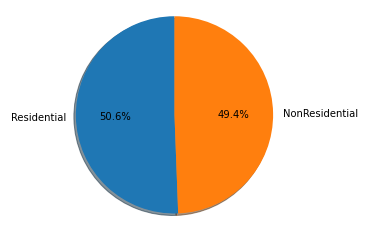

In [30]:
proportion_building = data["BuildingType"].value_counts() 
labels = proportion_building.index
fig, ax = plt.subplots()
ax.pie(proportion_building, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [31]:
NonResidential = (data['BuildingType']== 'NonResidential')

In [32]:
data = data[NonResidential]

In [33]:
data.shape

(3318, 29)

# Elimination des doublons

In [34]:
#data = data.drop_duplicates(subset ="OSEBuildingID", keep = 'first', inplace=True)

Nous décidons de ne pas éliminer les doublons puisqu'utiles à notre étude. Les données ont pu changer entre 2015 et 2016.

# Détection d'outliers

In [34]:
data.shape

(3318, 29)

In [35]:
data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3318.000000,3318.000000,3318.000000,3318.000000,3316.000000,3310.000000,3.318000e+03,3318.000000,3.318000e+03,3318.000000,2211.000000,3308.000000,3309.000000,3.309000e+03,3.309000e+03,3.309000e+03,3.309000e+03,3309.000000,3309.000000
mean,15951.816154,2015.502712,4.365883,1961.536769,1.117310,4.126888,1.156672e+05,13303.304702,1.023639e+05,23449.367479,64.815920,71.608343,175.440012,8.068625e+06,4.934034e+05,5.636556e+06,1.876485e+06,177.038779,1.479716
std,13411.897096,0.500068,2.195304,32.709772,2.219845,6.567333,2.511222e+05,43596.620504,2.340749e+05,50019.025915,28.549886,72.372179,180.787065,2.525462e+07,5.226678e+06,1.740900e+07,7.898387e+06,666.442480,2.214812
min,1.000000,2015.000000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,-2.000000,-5.055000e+04,0.000000,1.000000,0.000000,-2.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,579.000000,2015.000000,2.000000,1930.000000,1.000000,1.000000,2.951225e+04,0.000000,2.850775e+04,10631.000000,47.000000,33.200001,76.200000,1.223425e+06,0.000000e+00,7.236670e+05,0.000000e+00,19.720000,0.270000
50%,21122.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.924600e+04,0.000000,4.736800e+04,10631.000000,72.000000,51.700000,131.300003,2.505271e+06,0.000000e+00,1.623657e+06,4.797690e+05,49.160000,0.780000
75%,24556.750000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.047860e+05,0.000000,9.447150e+04,12353.000000,89.000000,81.699997,204.899994,6.917280e+06,0.000000e+00,4.878886e+06,1.471375e+06,138.870000,1.760000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,686750.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


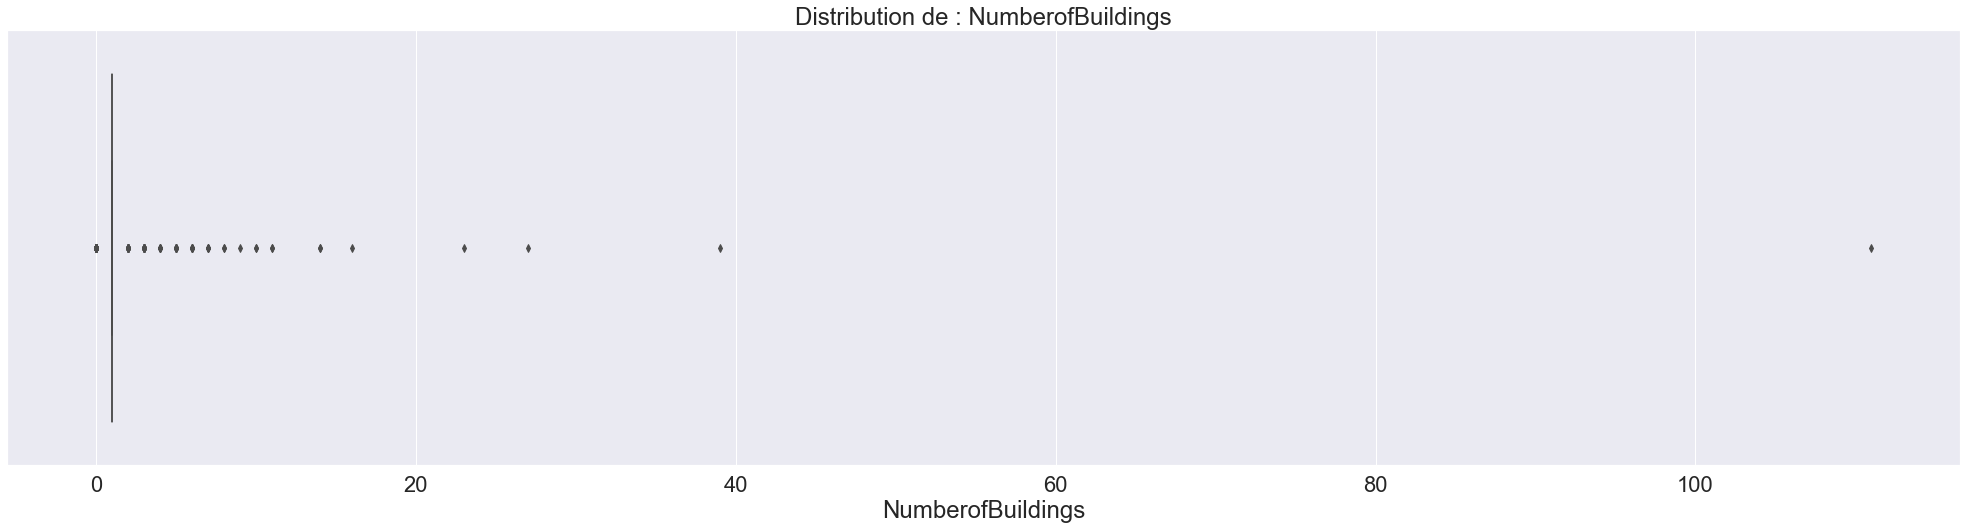

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


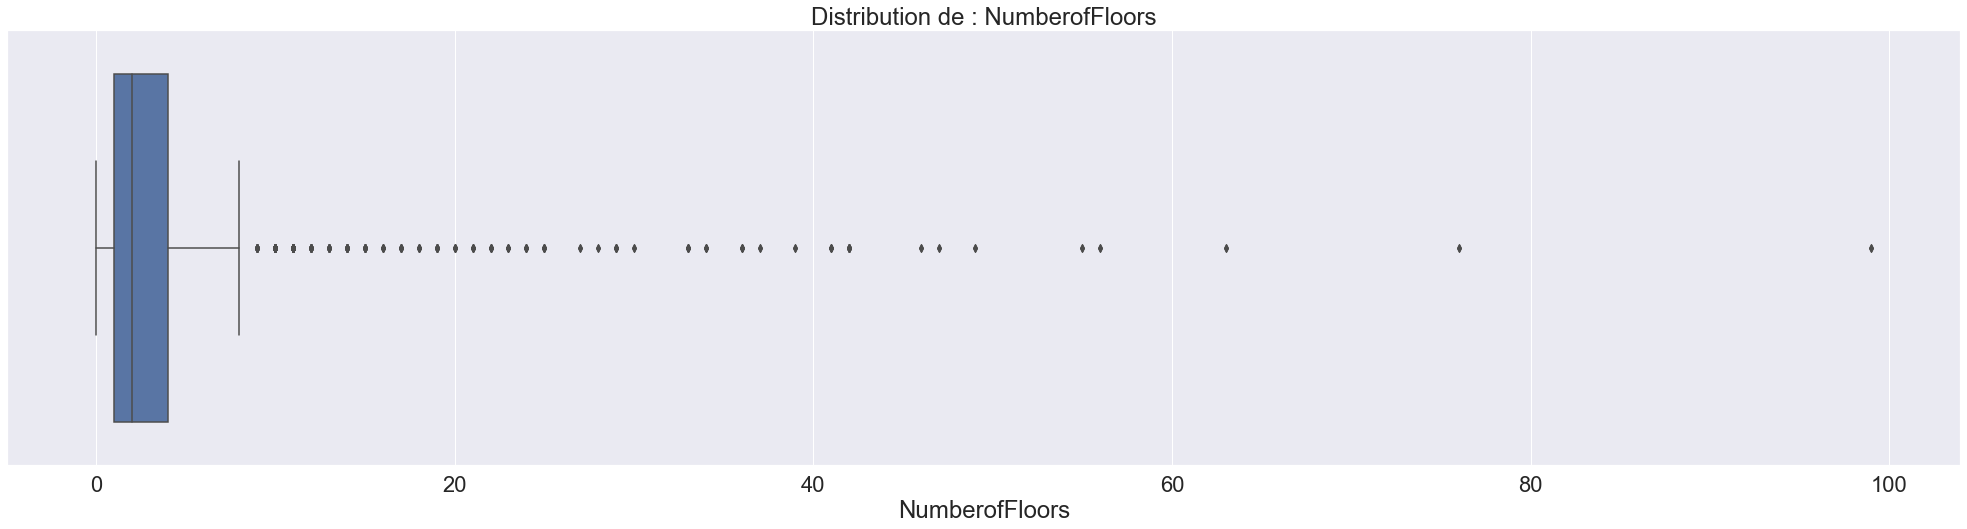

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


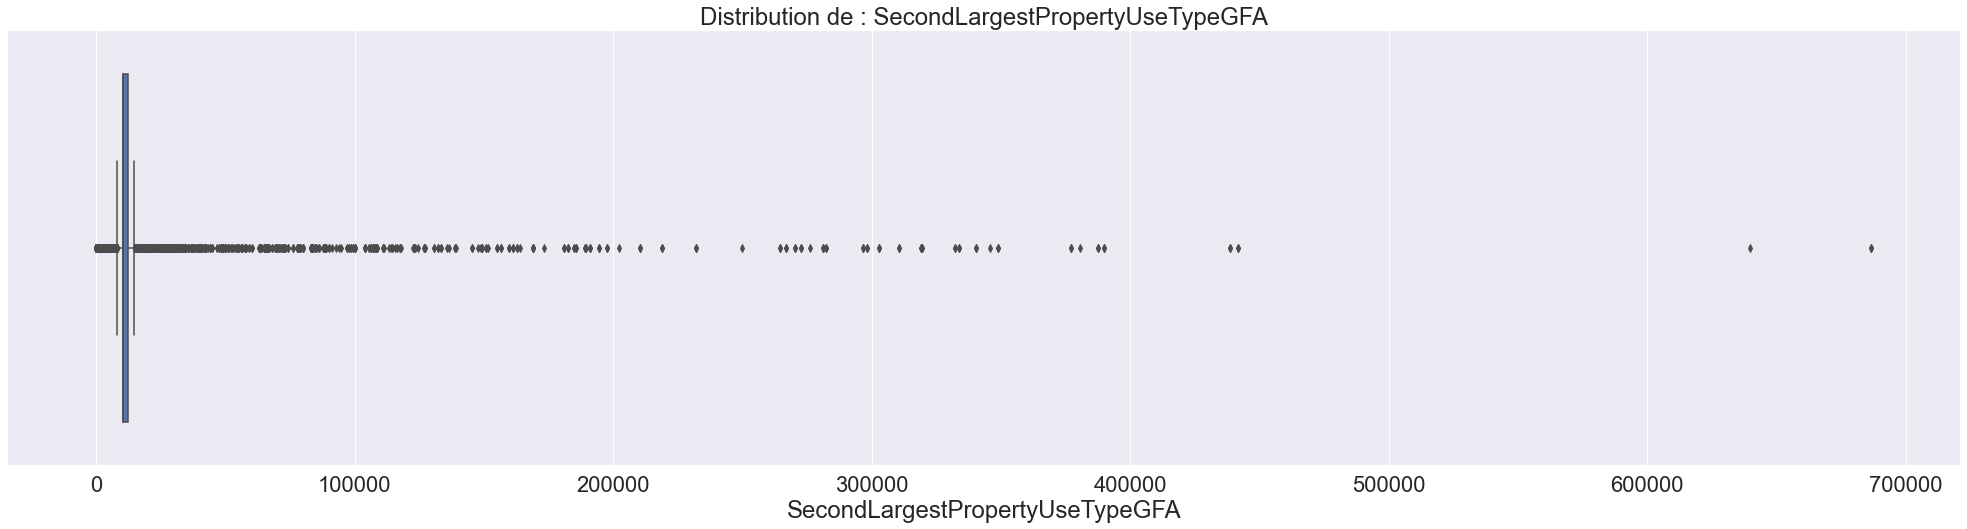

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


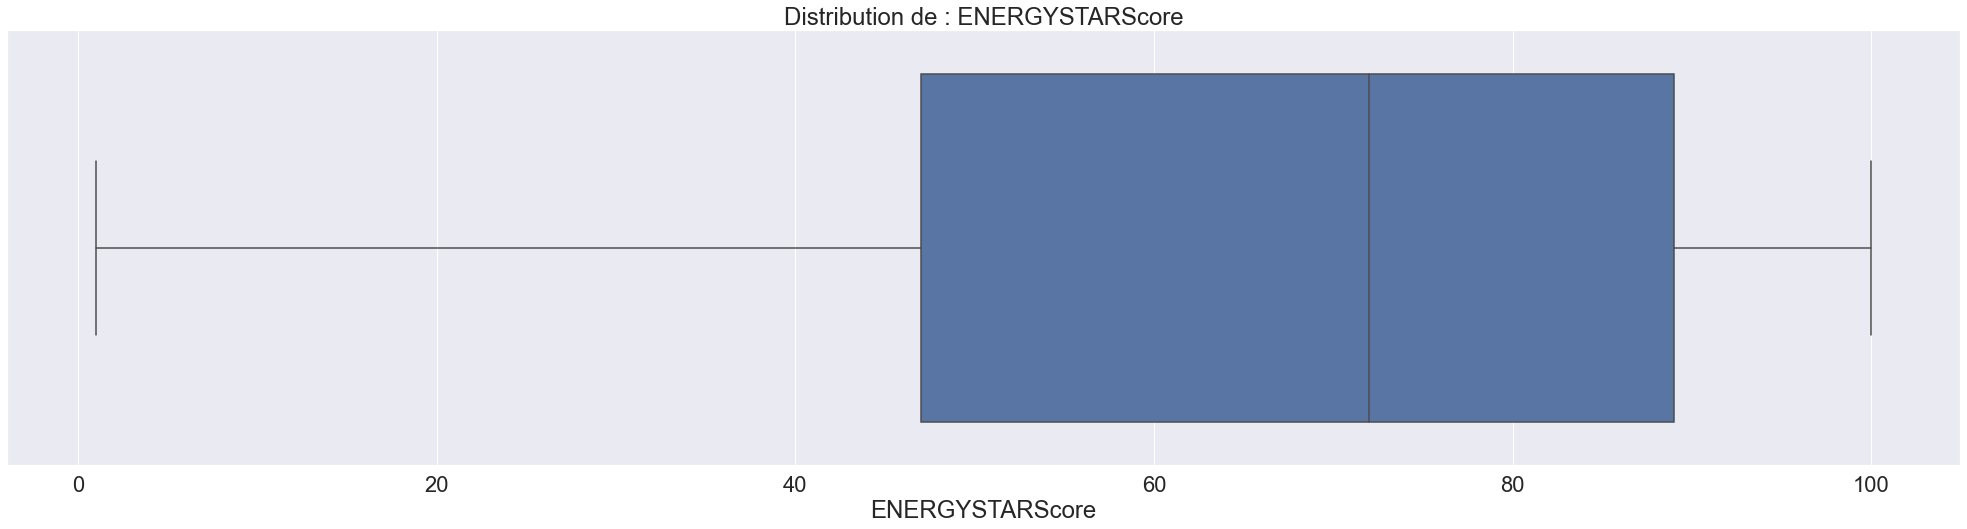

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


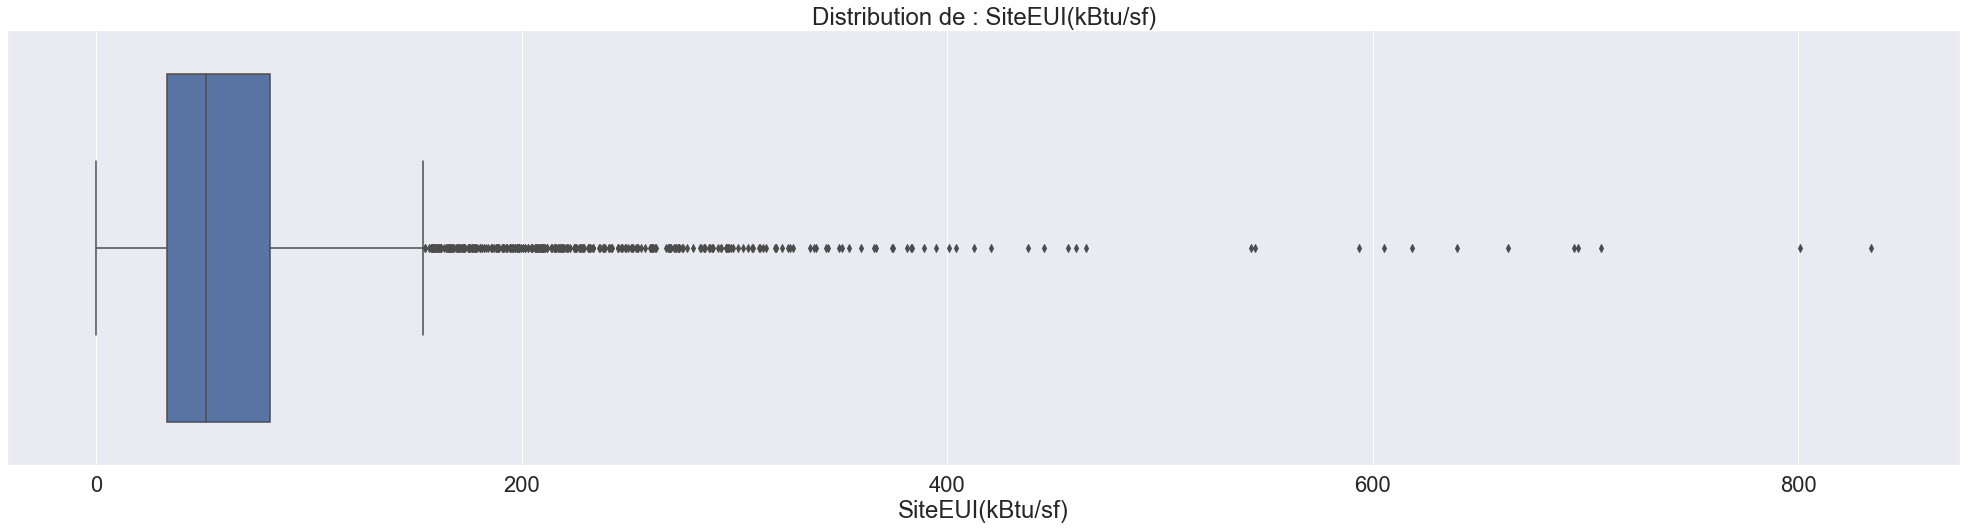

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


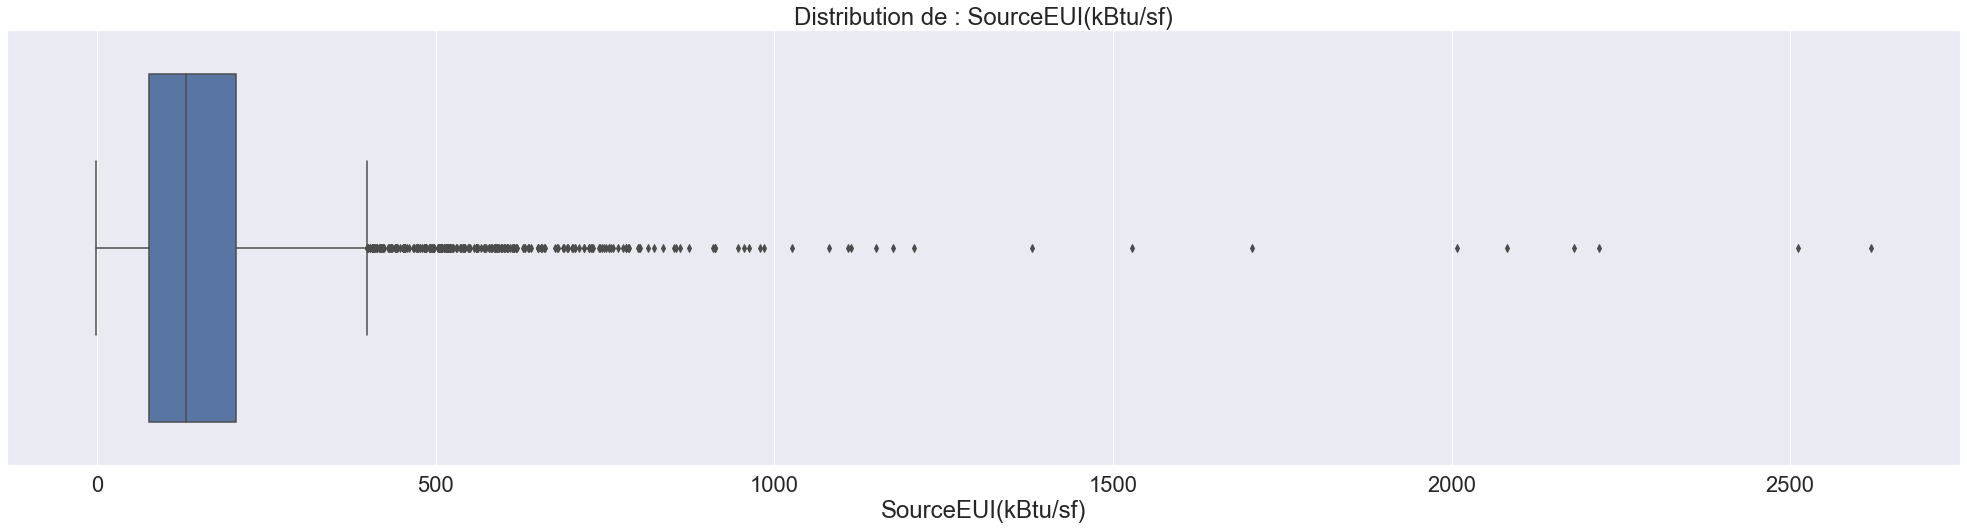

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


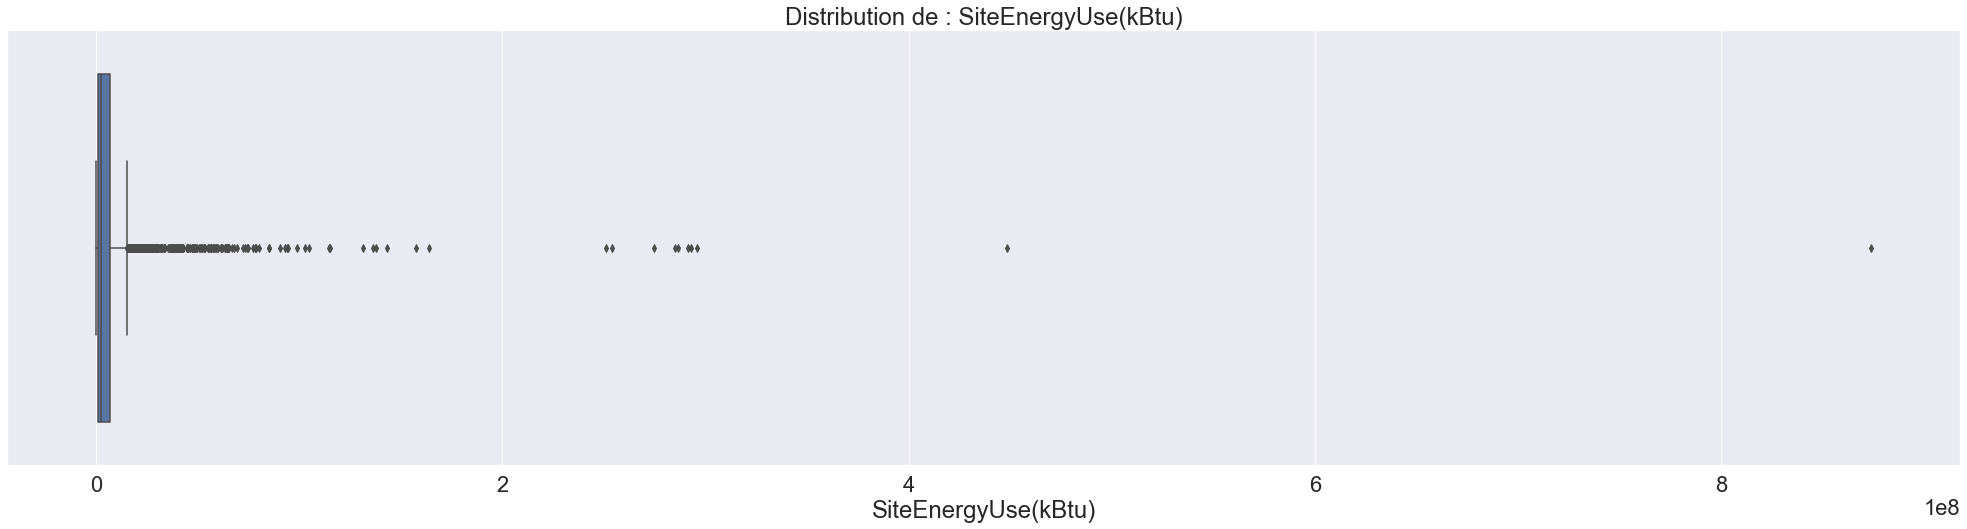

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


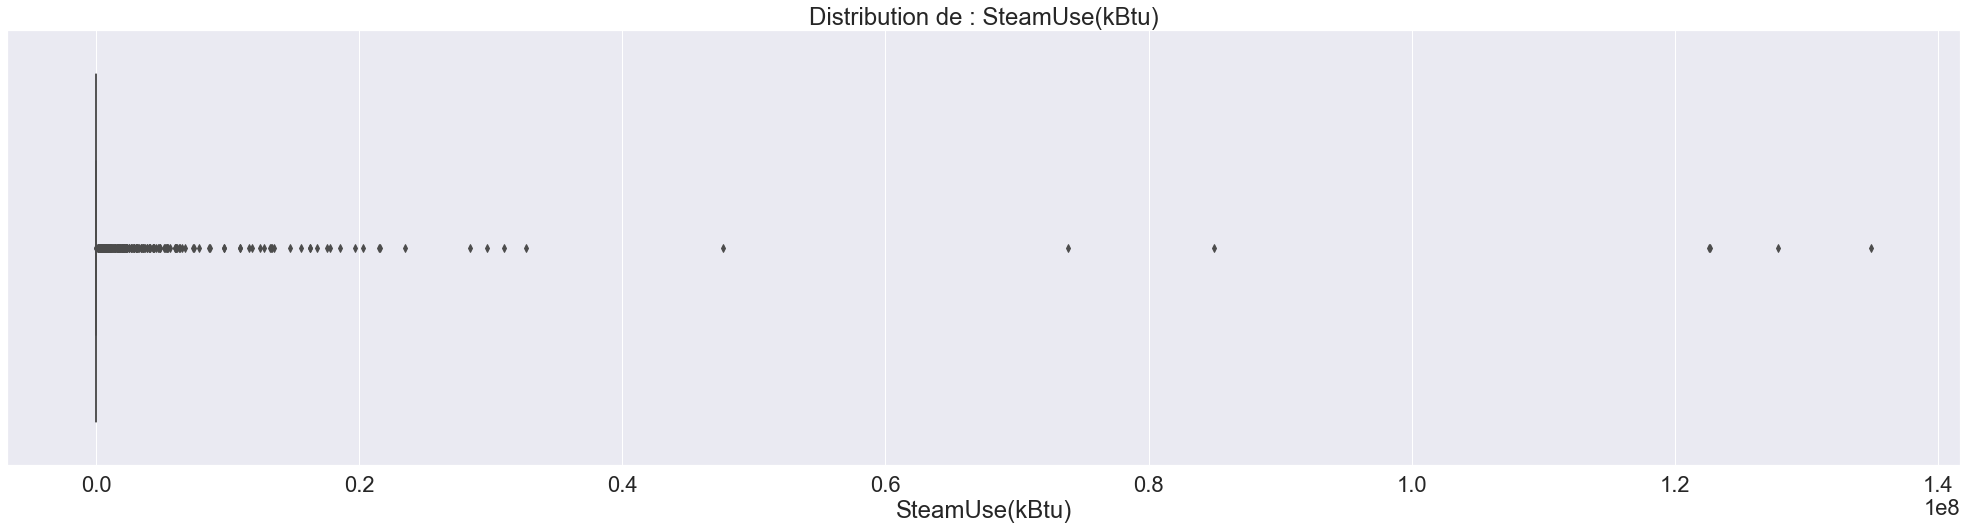

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


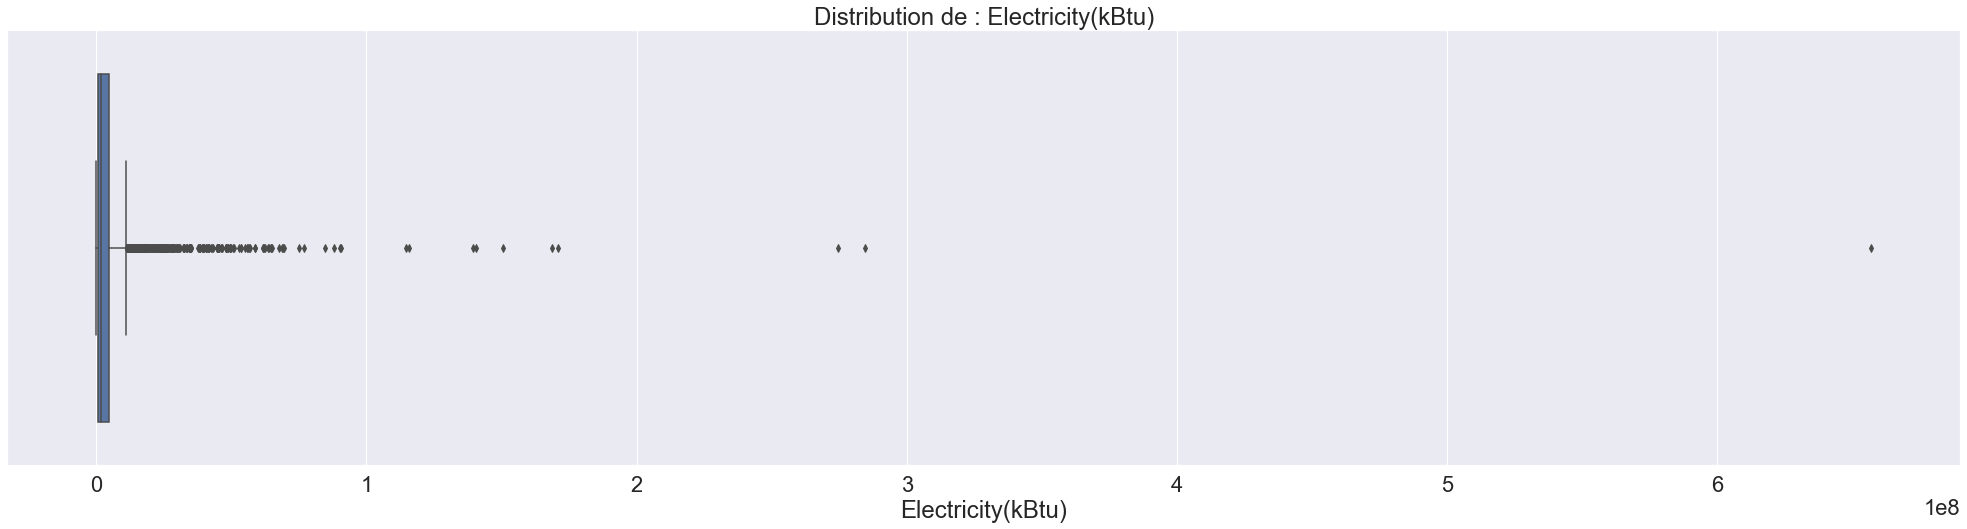

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


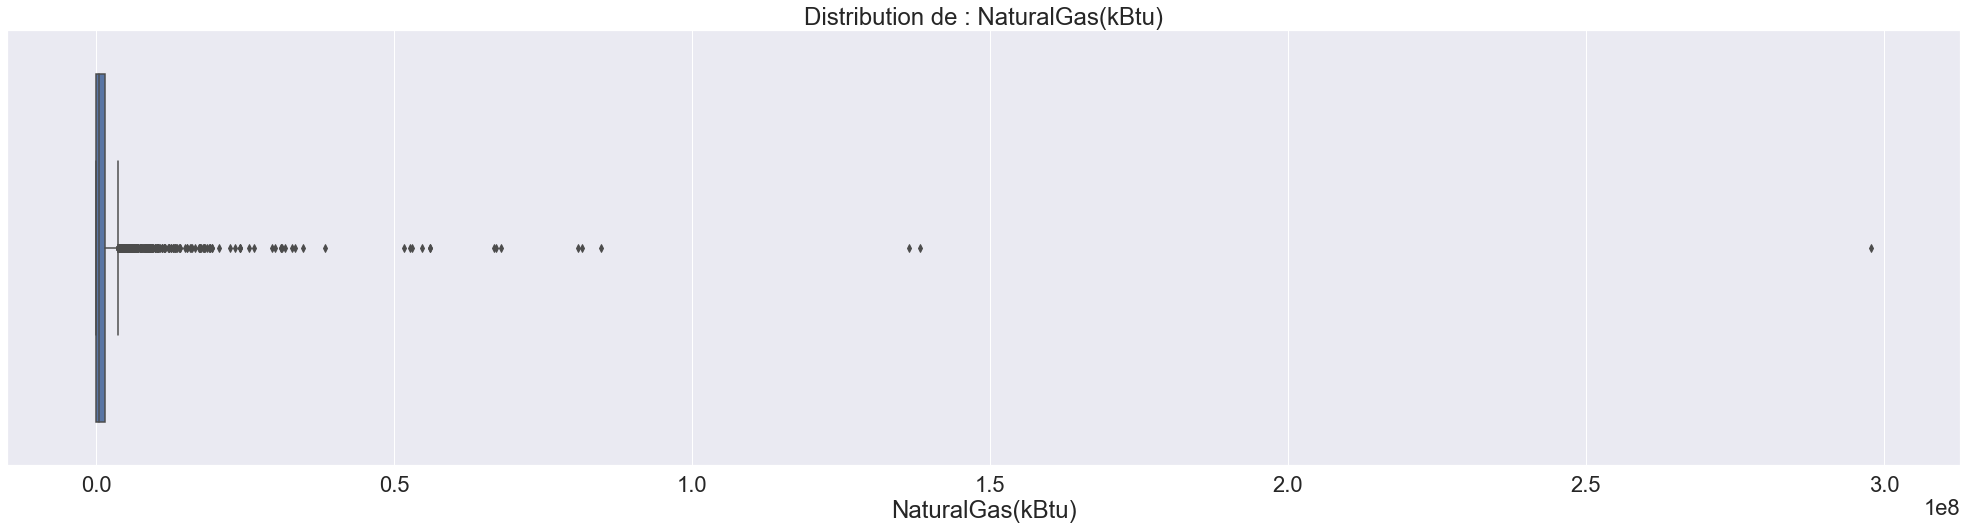

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


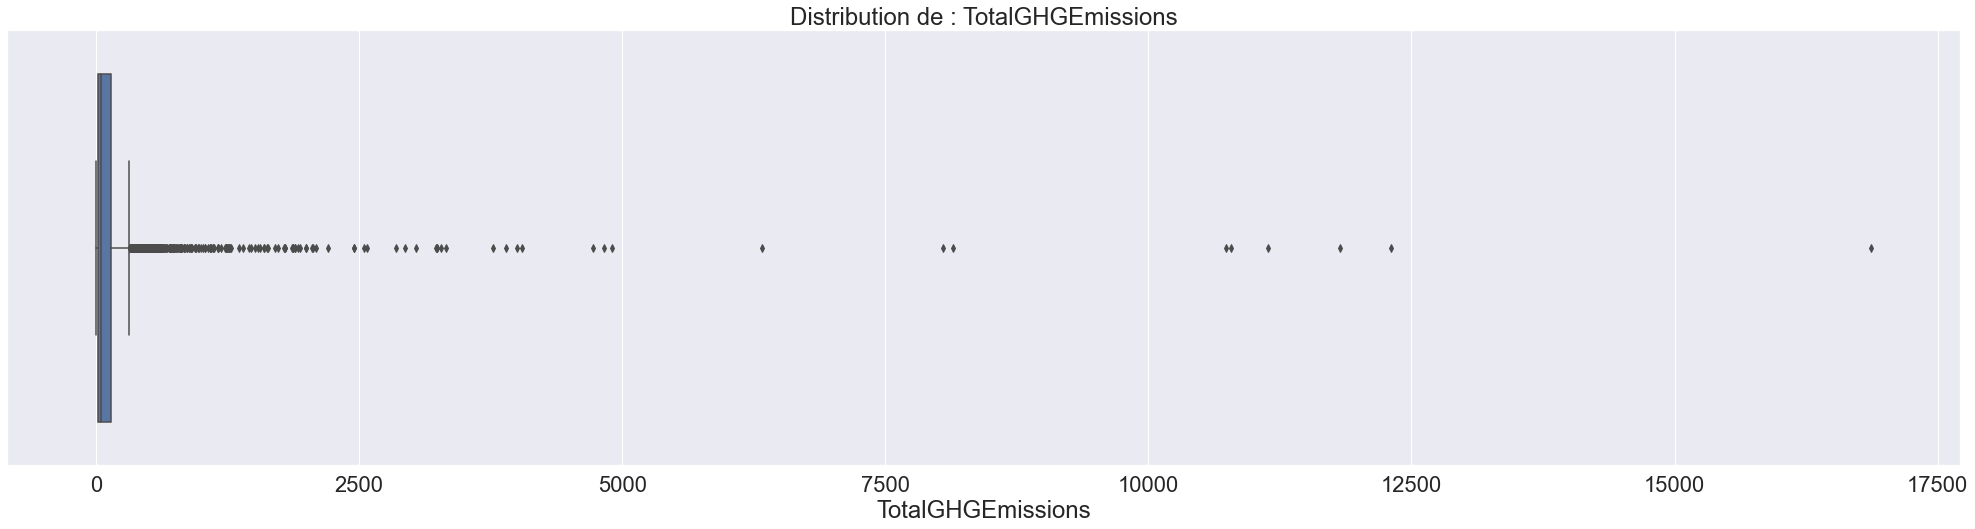

C:\Users\nha5600\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


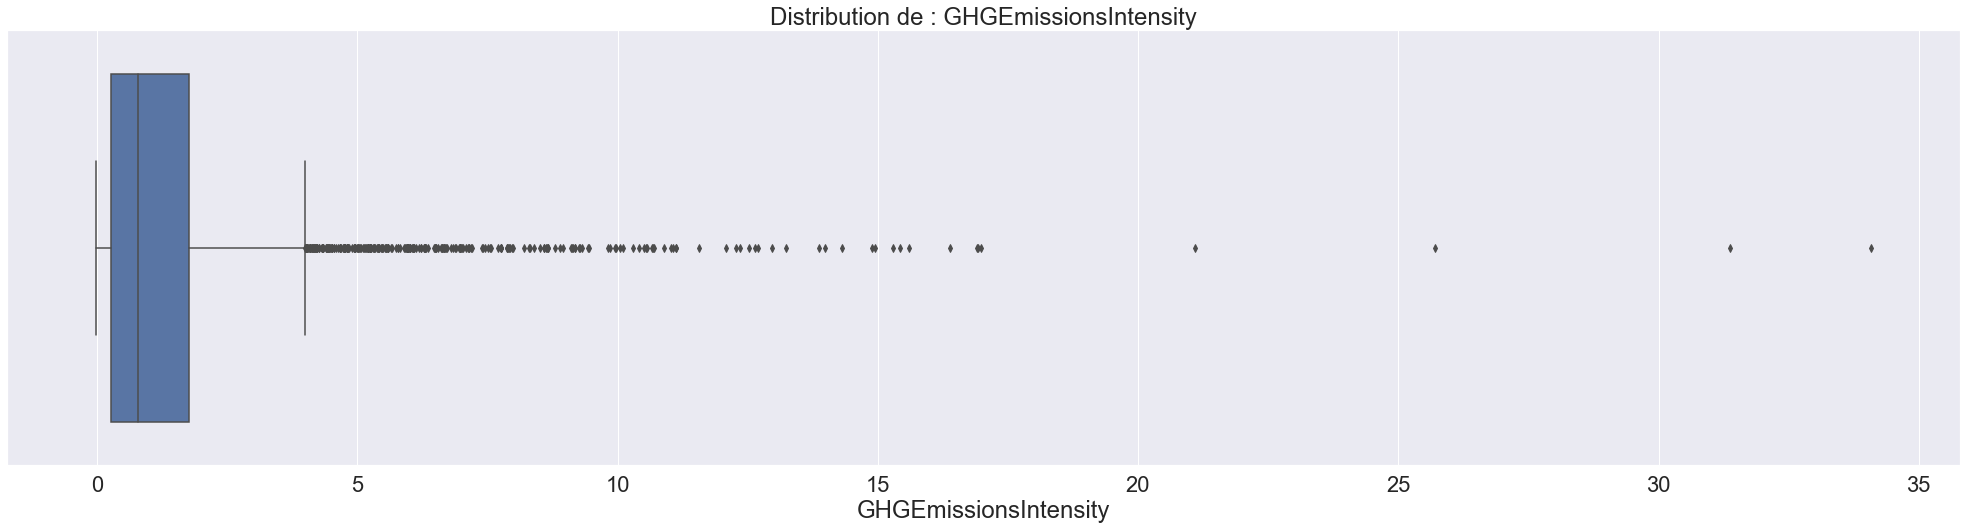

In [36]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (35,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [37]:
data.NumberofBuildings.describe()

count    3316.000000
mean        1.117310
std         2.219845
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       111.000000
Name: NumberofBuildings, dtype: float64

On détecte maintenant les Outliers en analysant chacune des colonnes que nous utiliserons.
Par exemple, on a 52 proprietes ayant un nombre de batiment qui est de 0, ce qui est impossible. Nous allons donc remplacer cette valeur par 1.

In [38]:
data[data.NumberofBuildings==data.NumberofBuildings.min()].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
63,89,2016,NonResidential,Medical Office,Polyclinic North && South,1978201270,3,EAST,1965,0.0,...,93.300003,213.399994,16701055.00,0.0,9886484.0,6814570.0,False,Compliant,430.84,2.41
76,113,2016,NonResidential,Small- and Mid-Sized Office,KCTS9,1988200705,7,MAGNOLIA / QUEEN ANNE,1986,0.0,...,74.900002,235.199997,4166306.25,0.0,4166305.0,0.0,False,Compliant,29.04,0.44
160,257,2016,NonResidential,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,7666703020,1,GREATER DUWAMISH,1916,0.0,...,30.299999,95.099998,2411402.25,0.0,2411402.0,0.0,False,Compliant,16.81,0.21
201,322,2016,NonResidential,Large Office,Cox Media Group Seattle KIRO TV (322),0656000005,7,DOWNTOWN,1968,0.0,...,97.199997,305.100006,9788717.00,0.0,9788716.0,0.0,False,Compliant,68.24,0.68
241,366,2016,NonResidential,Small- and Mid-Sized Office,University District Office Buiding,1142000500,4,NORTHEAST,1961,0.0,...,59.400002,137.600006,4728488.50,0.0,2863212.0,1865277.0,False,Compliant,119.03,1.20


In [39]:
data.loc[data['NumberofBuildings']==0,'NumberofBuildings']=1

Intéressons nous maintenant au nombre d'étages dans les batiments pour détecter une présence ou non d'Outliers :

In [40]:
data.NumberofFloors.describe()

count    3310.000000
mean        4.126888
std         6.567333
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64

99 étages maximum semble être beaucoup mais ça peut représenter un gratte-ciel. Nous le laissons. Analysons maintenant la consommation de vapeur dans les batiments :

In [41]:
data['SteamUse(kBtu)'].describe()

count    3.309000e+03
mean     4.934034e+05
std      5.226678e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64

on peut avoir des batiments qui ne consomment pas de vapeur, on peut les laisser. Voyons l'électricité :

In [42]:
data['Electricity(kBtu)'].describe()

count    3.309000e+03
mean     5.636556e+06
std      1.740900e+07
min     -1.154170e+05
25%      7.236670e+05
50%      1.623657e+06
75%      4.878886e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64

In [43]:
elec_negatif = data['Electricity(kBtu)'] <= 0
elec_negatif.sum()

14

Nous avons 14 batiments avec une consommation d'électricité négative ou nulle. Nous les supprimons :

In [44]:
data =data.drop(index=data[elec_negatif].index)

Voyons la consommation de gaz des bâtiments :

In [45]:
gaz_nul = data['NaturalGas(kBtu)'] == 0
sum(gaz_nul)

930

Nous avons 930 batiments qui ont une consommation nulle en gaz. Nous les laissons car on peut avoir des batiments qui ne consomment que de l'electricite 

Pour transformer les distributions variables, nous passons nos les variables cibles en log que nous souhaitons étudier par la suite. 
Nous utilisons cette transformation également pour avoir notre analyse graphique sur les variables.

#    # Transformation des variables

In [46]:
data['TotalGHGEmissionsLog']=data['TotalGHGEmissions'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

In [47]:
data['SiteEnergyUse(kBtu)Log']=data['SiteEnergyUse(kBtu)'].apply(lambda i: np.log10(i) if i > 0 else np.NaN)

In [48]:
data['SiteEnergyUse(kBtu)Log'].describe()

count    3275.000000
mean        6.471436
std         0.575071
min         4.058464
25%         6.091358
50%         6.402639
75%         6.840520
max         8.941474
Name: SiteEnergyUse(kBtu)Log, dtype: float64

In [49]:
data['TotalGHGEmissionsLog'].describe()

count    3282.000000
mean        1.704777
std         0.665587
min        -1.096910
25%         1.297158
50%         1.691744
75%         2.142413
max         4.227140
Name: TotalGHGEmissionsLog, dtype: float64

# Analyse bivariée

L'objectif est de savoir si une variable qualitative a une influence sur nos valeurs quantitatives cibles.

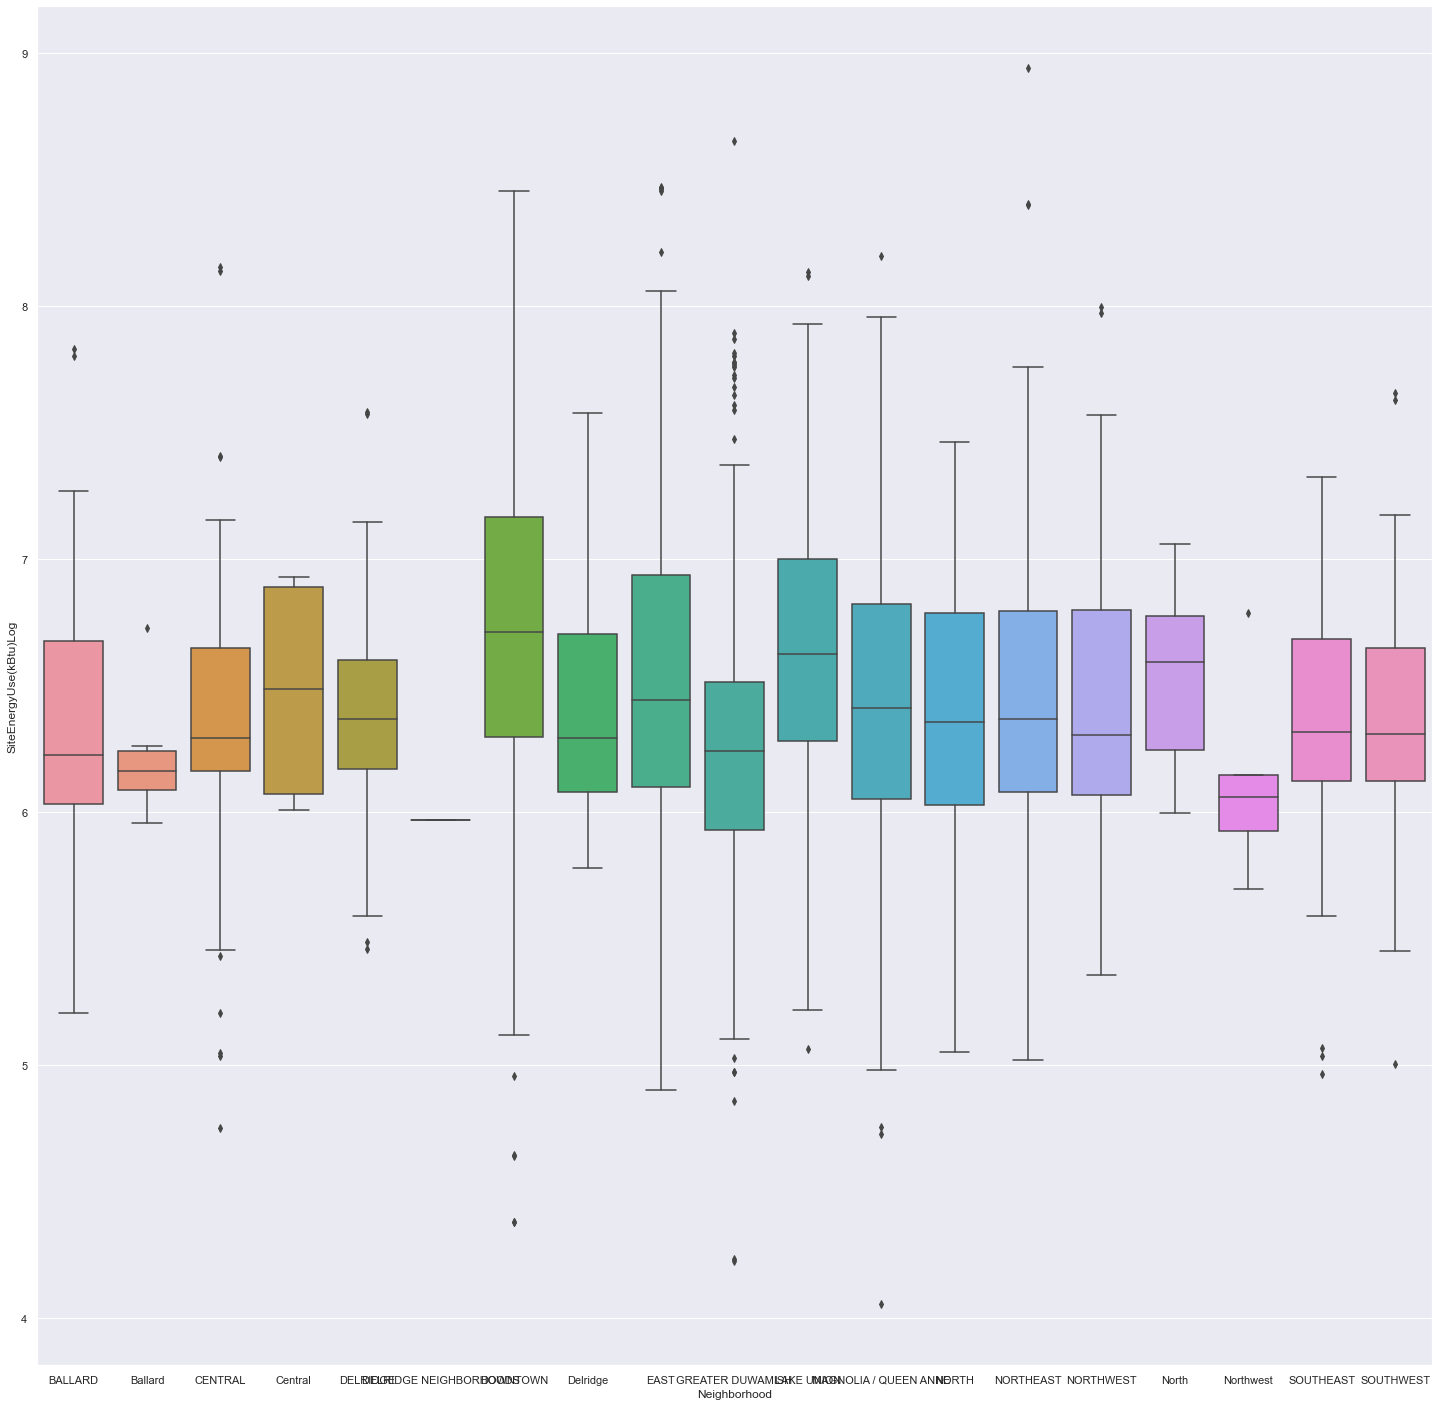

In [50]:
plt.figure(figsize=(25,25))
ax = sns.boxplot(x='Neighborhood', y='SiteEnergyUse(kBtu)Log', data=data.sort_values(['Neighborhood']))

plt.show()

L'objectif est de savoir si la variable qualitative catégorielle PrimaryPropertytype va influencer sur la variable quantitative SiteEnergyUse.

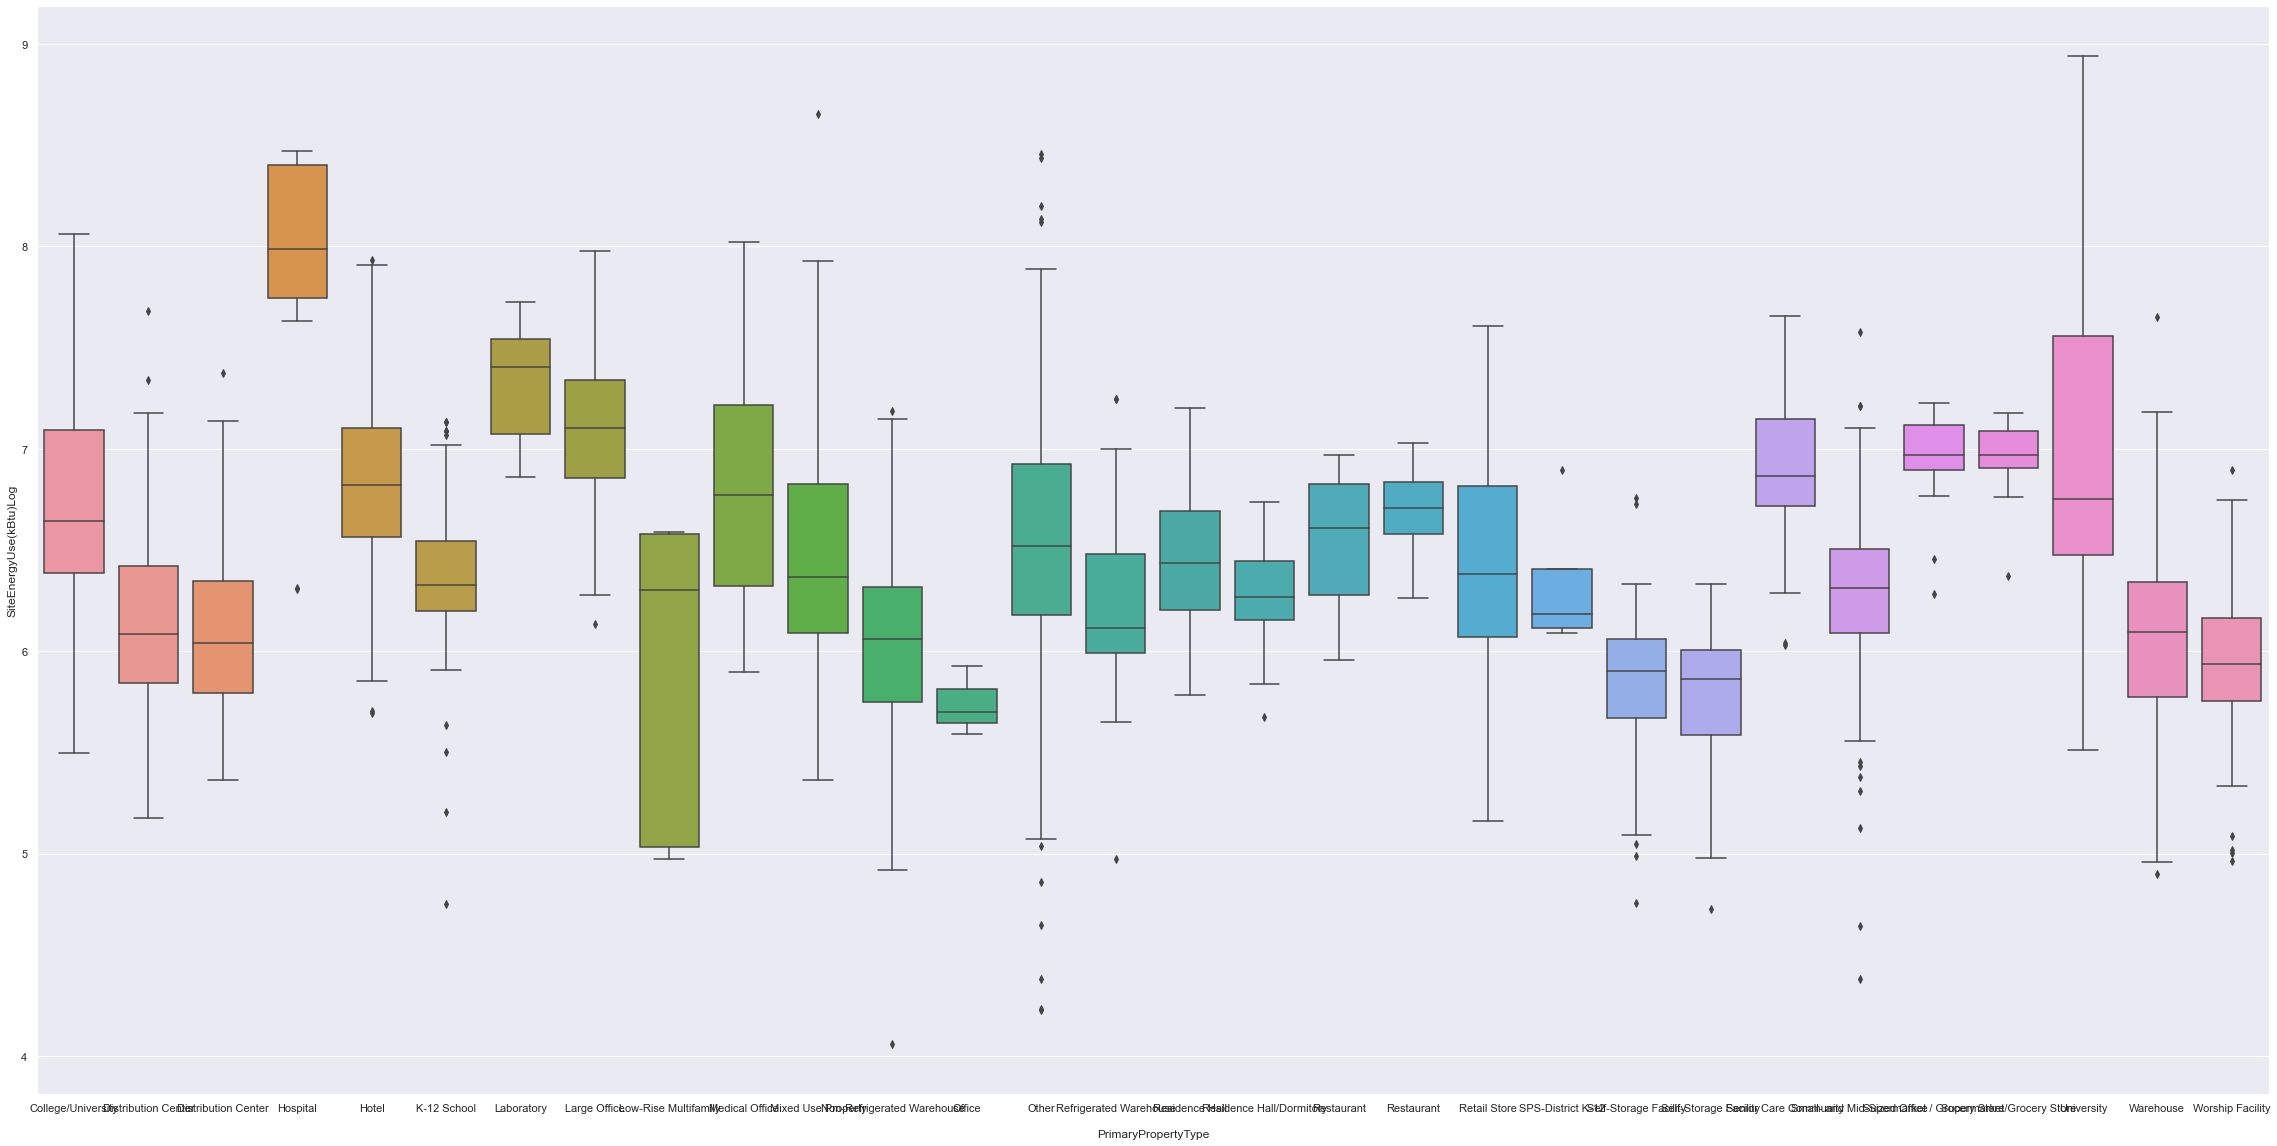

In [51]:
plt.figure(figsize=(40,20))
ax = sns.boxplot(x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)Log', data=data.sort_values(['PrimaryPropertyType']))

plt.show()

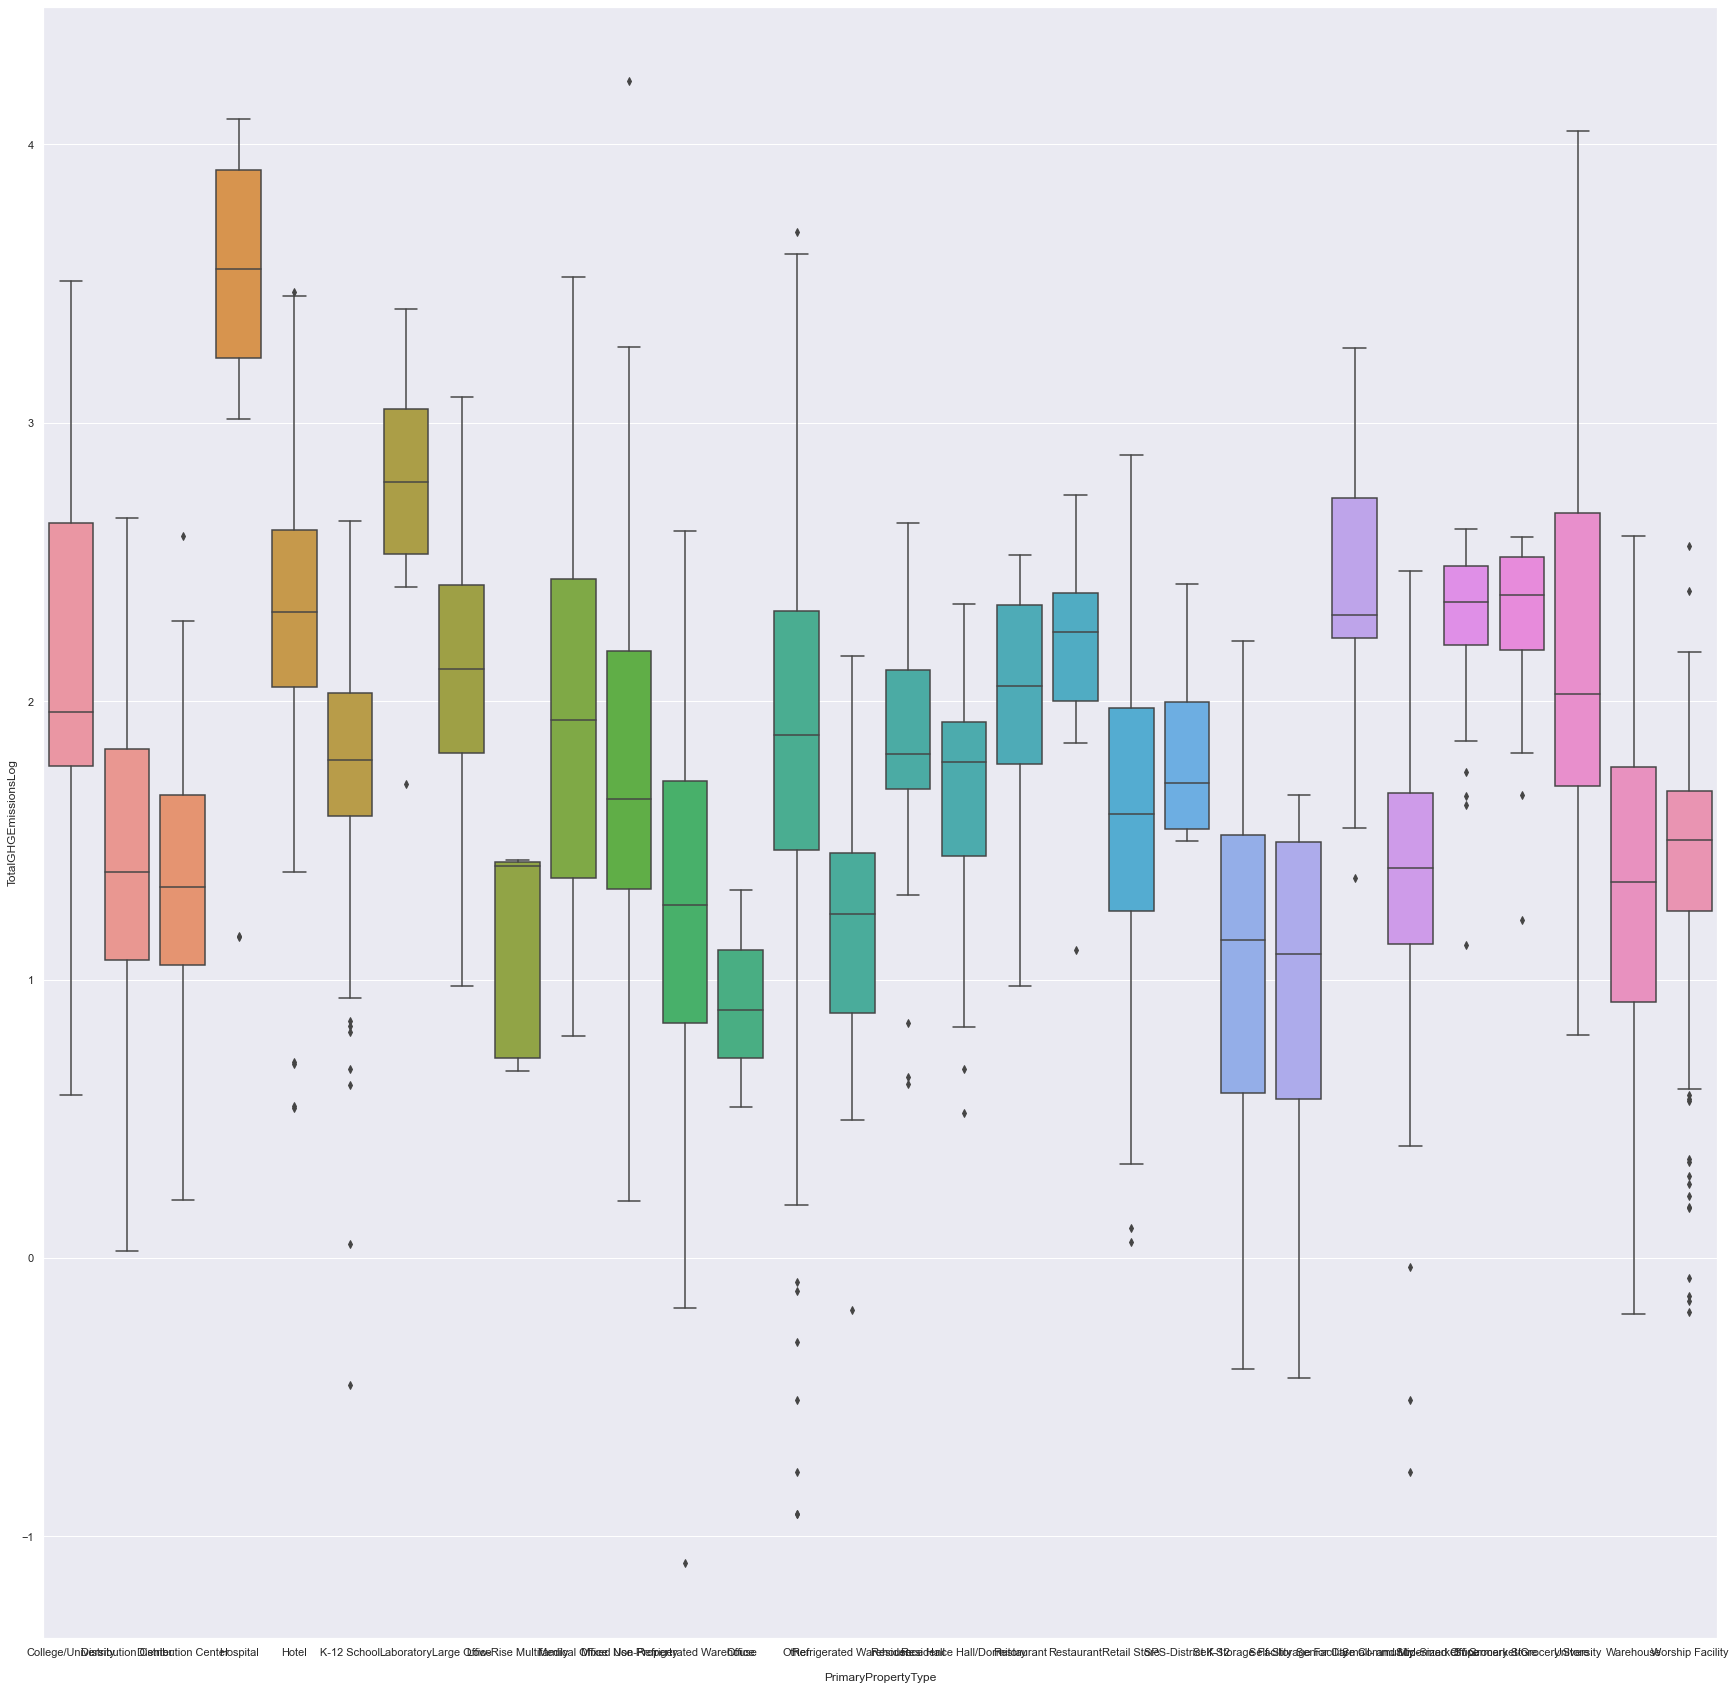

In [52]:
plt.figure(figsize=(30,30))
ax = sns.boxplot(x='PrimaryPropertyType', y='TotalGHGEmissionsLog', data=data.sort_values(['PrimaryPropertyType']))

plt.show()

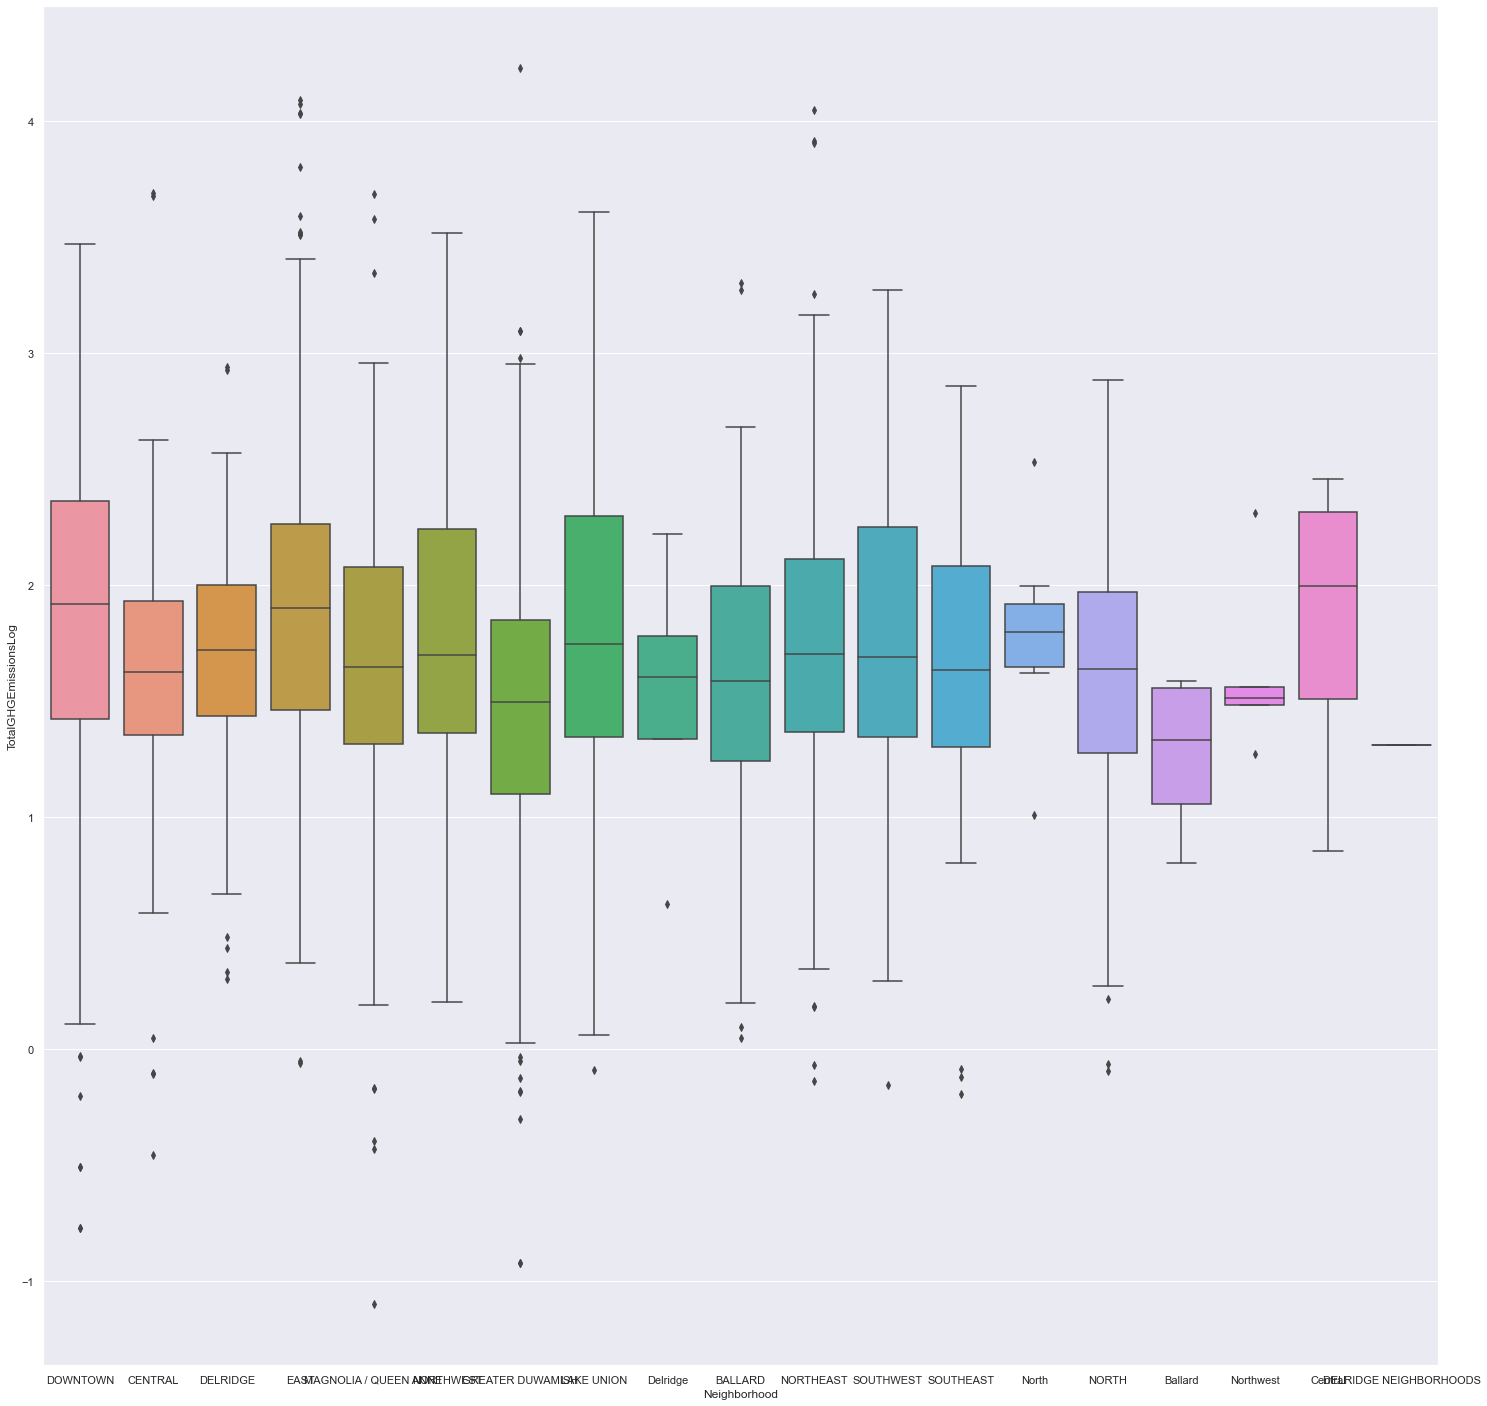

In [56]:
plt.figure(figsize=(25,25))
ax = sns.boxplot(x='Neighborhood', y='TotalGHGEmissionsLog', data=data.sort_values(['PrimaryPropertyType']))

plt.show()

# Tests de l'ANOVA

Nous réalisons une étude pour voir si nos variables catégorielles ont une incidence sur les variables cibles. Nous faisons un test de Fischer pour cela : 

In [53]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('TotalGHGEmissions ~ C(PrimaryPropertyType)', data=data[["PrimaryPropertyType","TotalGHGEmissions"]], drop_cols=None ).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(PrimaryPropertyType),5.013313e+08,29.0,58.125012,6.528170e-269
Residual,9.671956e+08,3252.0,NaN,NaN


In [54]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("TotalGHGEmissions ~ C(Neighborhood)", data=data[["Neighborhood","TotalGHGEmissions"]], drop_cols=None ).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Neighborhood),3.087874e+07,18.0,3.893602,5.463812e-08
Residual,1.437648e+09,3263.0,NaN,NaN


Les résultats du test de Fisher nous indiquent ici des p-value proche de 0 pour l'ensemble des catégories, donc inferieur au niveau de test de 5%. Le total des émissions de C02 et du voisinage/type de propriété suivent donc des distributions différentes. Nous pouvons donc intégrer nos variables qualitatives à notre étude.

# Export du fichier nettoyé

In [55]:
data.to_csv('Data_cleané.csv')